In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from resnet import *
from train import train, test
from dataset import *
from batchnorm import BatchNorm, CustomBatchNorm2d

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=12)

In [10]:
# model.eval()

In [11]:
# resnet18
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)

In [12]:
# print('customized batchnorm test')
# print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)
# train(model, trainloader, valloader)
# correct, total = test(model, testloader)
# print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

In [13]:
model = resnet18(pretrained=False)
initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])

norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()


In [14]:
# initial_state

In [15]:
# model = resnet18(pretrained=False, norm_layer=CustomBatchNorm2d).to(device)
# initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])
    

customized noise test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss 0.0633 val loss 0.0505 train acc 21.42 val acc 33.59 lr 0.1000
Epoch 2 of 32
train loss 0.0443 val loss 0.0421 train acc 37.10 val acc 41.93 lr 0.1000
Epoch 3 of 32
train loss 0.0385 val loss 0.0418 train acc 43.83 val acc 46.10 lr 0.1000
Epoch 4 of 32
train loss 0.0337 val loss 0.0386 train acc 48.74 val acc 48.52 lr 0.1000
Epoch 5 of 32
train loss 0.0301 val loss 0.0370 train acc 53.47 val acc 48.63 lr 0.1000
Epoch 6 of 32
train loss 0.0269 val loss 0.0321 train acc 57.27 val acc 52.69 lr 0.1000
Epoch 7 of 32
train loss 0.0228 val loss 0.0333 train acc 62.80 val acc 53.57 lr 0.1000
Epoch 8 of 32
train loss 0.0203 val loss 0.0300 train acc 66.16 val acc 55.65 lr 0.1000
Epoch 9 of 32
train loss 0.0126 val loss 0.0229 train acc 79.35 val acc 66.19 lr 0.0100
Epoch 10 of 32
train loss 0.0102 val loss 0.0211 train acc 83.15 val acc 65.86 lr 0.0100
Epoch 11 of 32
train loss 0.0091 val loss 0.0209 train acc 84.93 val acc 66.30 lr 0.0100
Epoch 12 of 32
train loss 0.0083 val loss 0.

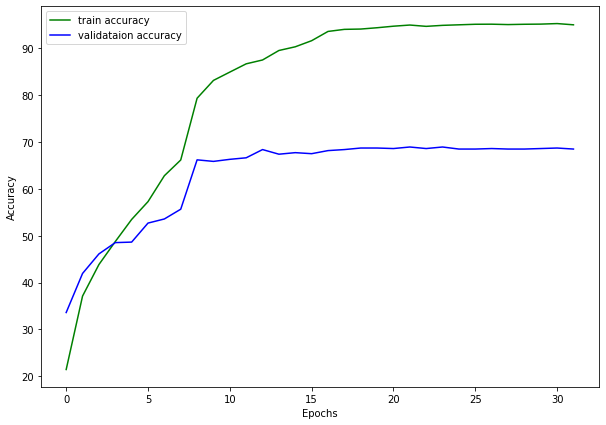

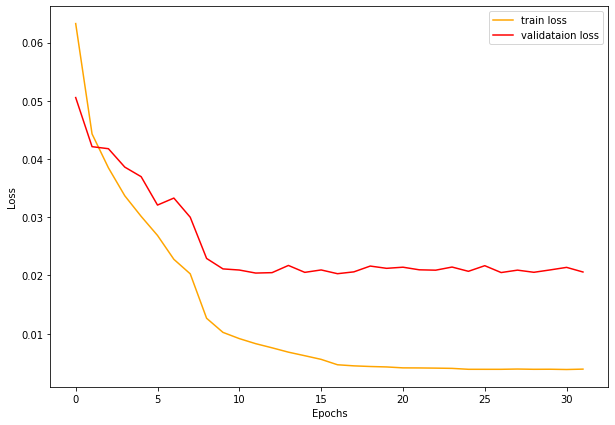

In [16]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized noise test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0676 val loss 0.0582 train acc 18.34 val acc 24.04 lr 0.1000
Epoch 2 of 32
train loss 0.0493 val loss 0.0540 train acc 30.94 val acc 31.17 lr 0.1000
Epoch 3 of 32
train loss 0.0430 val loss 0.0453 train acc 37.99 val acc 37.10 lr 0.1000
Epoch 4 of 32
train loss 0.0394 val loss 0.0429 train acc 41.05 val acc 40.72 lr 0.1000
Epoch 5 of 32
train loss 0.0357 val loss 0.0405 train acc 46.42 val acc 45.12 lr 0.1000
Epoch 6 of 32
train loss 0.0329 val loss 0.0387 

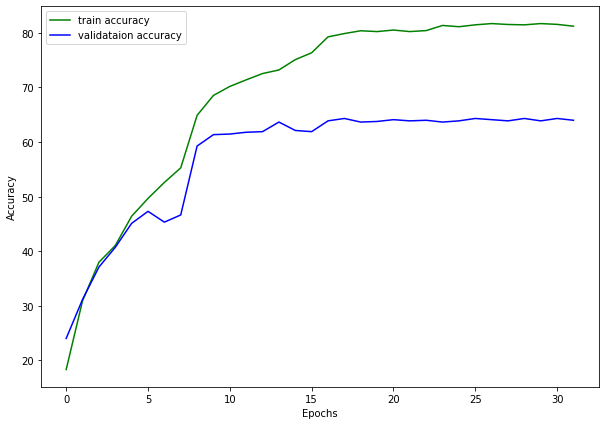

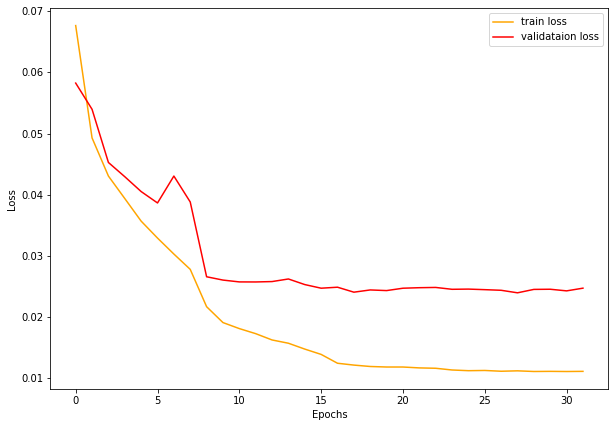

In [17]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0697 val loss 0.0547 train acc 18.49 val acc 28.43 lr 0.1000
Epoch 2 of 32
train loss 0.0483 val loss 0.0472 train acc 32.59 val acc 37.54 lr 0.1000
Epoch 3 of 32
train loss 0.0423 val loss 0.0437 train acc 39.26 val acc 40.83 lr 0.1000
Epoch 4 of 32
train loss 0.0381 val loss 0.0429 train acc 43.70 val acc 42.59 lr 0.1000
Epoch 5 of 32
train loss 0.0348 val loss 0.0387 train acc 47.31 val acc 46.76 lr 0.1000
Epoch 6 of 32
train loss 0.0316 val loss 0.0393 train acc 51.59 val ac

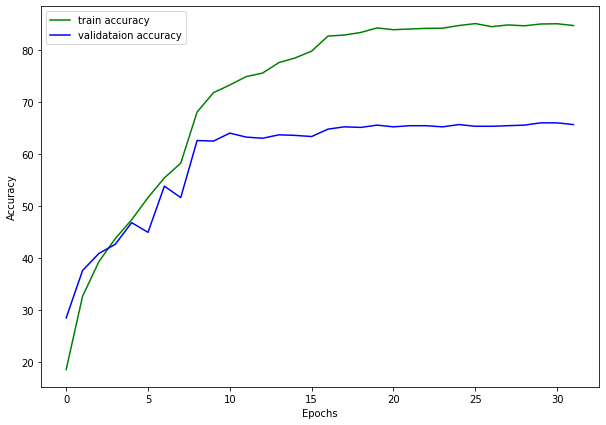

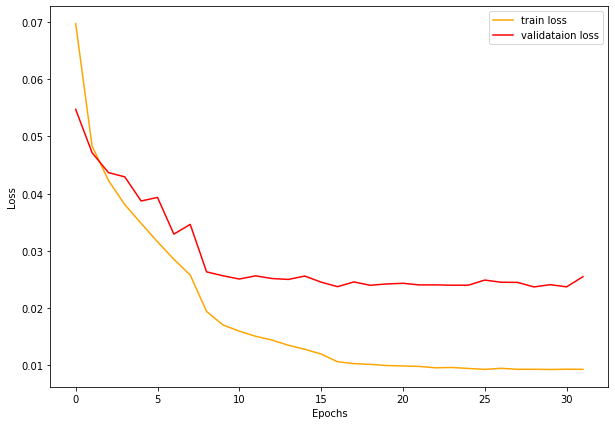

In [18]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0680 val loss 0.0545 train acc 19.27 val acc 30.08 lr 0.1000
Epoch 2 of 32
train loss 0.0493 val loss 0.0504 train acc 31.62 val acc 33.15 lr 0.1000
Epoch 3 of 32
train loss 0.0435 val loss 0.0450 train acc 38.19 val acc 39.08 lr 0.1000
Epoch 4 of 32
train loss 0.0389 val loss 0.0430 train acc 43.97 val acc 42.70 lr 0.1000
Epoch 5 of 32
train loss 0.0353 val loss 0.0407 train acc 47.75 val acc 45.55 lr 0.1000
Epoch 6 of 32
train loss 0.0325 val loss 0.0374 train acc 50.12 val ac

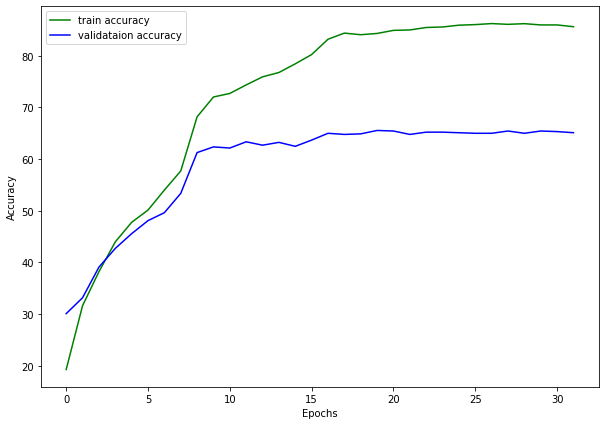

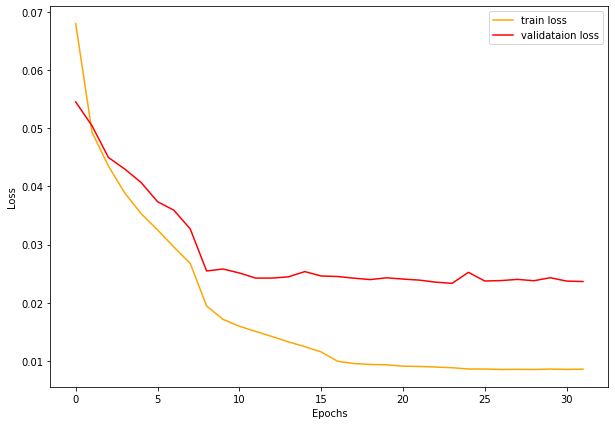

In [19]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))